### K Means Clustering

In [23]:
### importing the libraries

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings('ignore')



In [2]:
## load the dataset

dataset = pd.read_csv("C:\\Users\\Hi\\Downloads\\Mall_Customers (1).csv")

In [3]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
x = dataset.iloc[:,3:].values

In [8]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_sc = sc.fit_transform(x)
pd.DataFrame(x_sc)

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


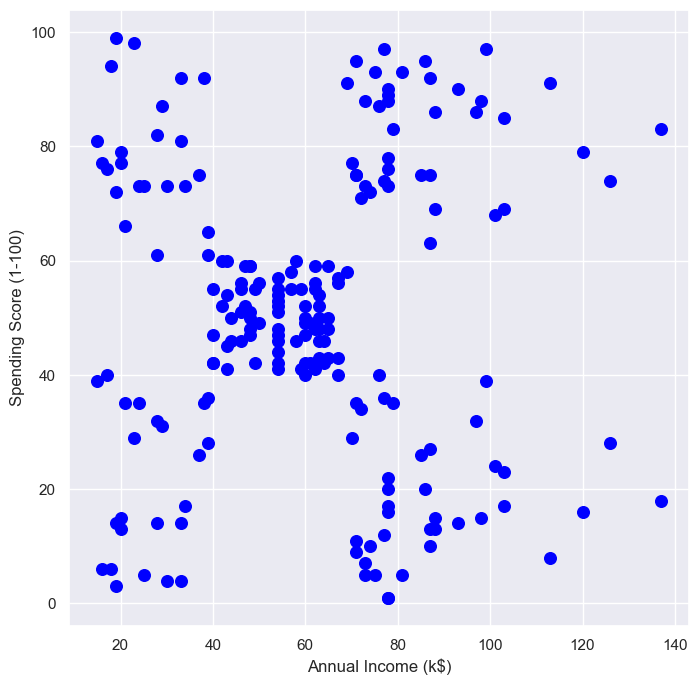

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(dataset[['Annual Income (k$)']], dataset[['Spending Score (1-100)']], s=70, c='blue')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [11]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,15):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state=1)
    kmeans.fit(x_sc)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[400.0,
 269.1425070447921,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.10377812115057,
 44.91118554999014,
 37.15135706793106,
 33.854106217363686,
 29.076176851244274,
 26.23063414845604,
 23.374099865085544,
 21.260965079895303,
 18.86230750576736]

In [13]:
len(wcss)

14

In [14]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

In [ ]:
sns.pointplot(a,wcss)

In [16]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state=1)
y_kmeans=kmeans.fit_predict(x_sc)
y_kmeans

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [17]:
combined = pd.concat([dataset,pd.DataFrame(y_kmeans)],axis=1)

In [18]:
combined.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


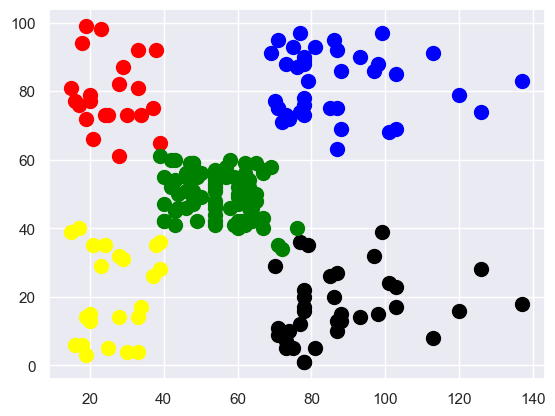

In [24]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='red', label='Cluster0')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='black', label='Cluster1')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label='Cluster2')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s=100, c='blue', label='Cluster3')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1], s=100, c='yellow', label='Cluster4')
plt.show()

In [20]:
### silhoutte score

from sklearn.metrics import silhouette_score

In [21]:
silhouette_score(x,y_kmeans)

0.553931997444648

In [ ]:
# Silhouette score range is between -1 and +1
# -1 : clustering is wrong
# 0 = same cluster
# 1 = Cluster are far awary

In [22]:
combined.to_csv('final_report_clustering.csv')

### Hierarchial Clustering

In [25]:
import scipy.cluster.hierarchy as sch

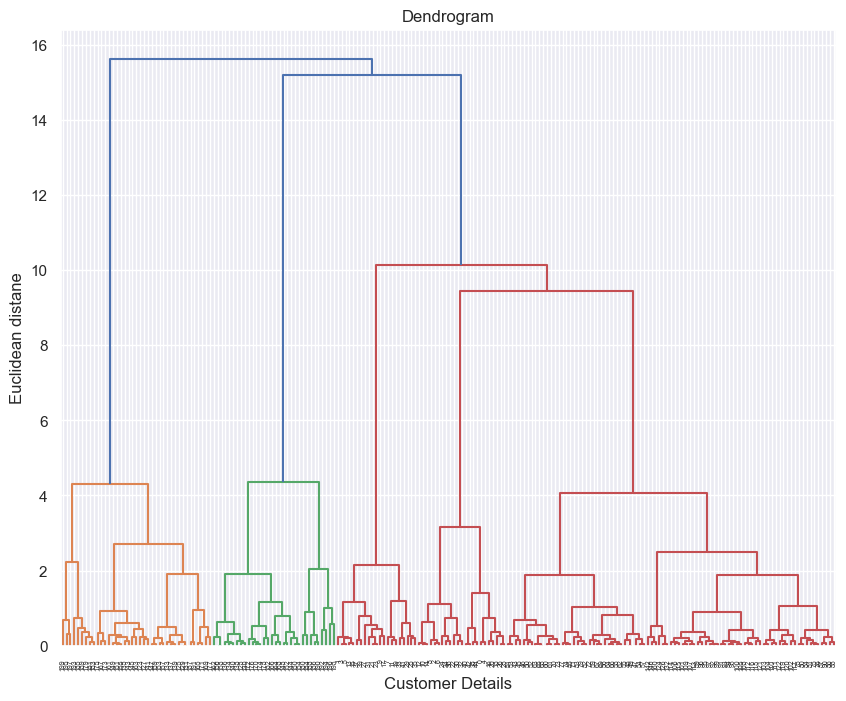

In [26]:
plt.figure(figsize=(10,8))

Dendrogram = sch.dendrogram(sch.linkage(x_sc,method="ward"))
plt.title('Dendrogram')
plt.xlabel("Customer Details")
plt.ylabel("Euclidean distane")
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
hcc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage = 'ward')

y_hc = hcc.fit_predict(x_sc)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [30]:
combined_hc = pd.concat([dataset, pd.DataFrame(y_hc)], axis=1)
combined_hc

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


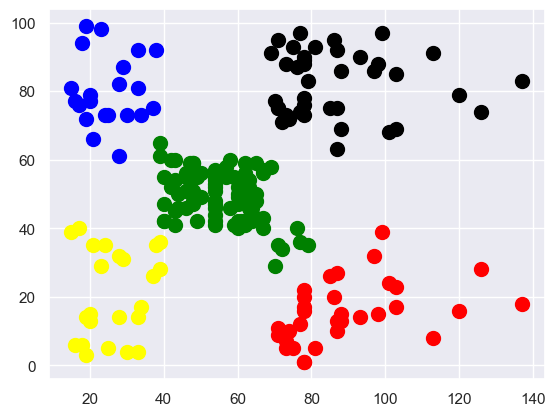

In [31]:
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='HieraricalCluster0')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='black', label='HieraricalCluster1')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='green', label='HieraricalCluster2')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1], s=100, c='blue', label='HieraricalCluster3')
plt.scatter(x[y_hc==4,0], x[y_hc==4,1], s=100, c='yellow', label='HieraricalCluster4')
plt.show()

In [32]:
silhouette_score(x, y_hc)

0.5529945955148897

                                    *****END*****